## Mod 5 Final Project Submission

Please fill out:
* Student name: John Lemaster
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Business Case

Adventure Works Cycles wants to analyze customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a new bike.  The marketing dept wants to manage their budgets and spend those dollars on the best possible campaigns.  Therefore, we will create several Machine Learning models to decipher which demographic features should be used to target the best possible prospects for new bike purchases.  

These models should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchases is available.  We will compare these models and decide based upon traditional data science model evaluations which one is best and recommend which demographic features to focus our marketing efforts.   

# OBTAIN

## Imports

In [1]:
import pandas as pd
import glob

In [2]:
import os


In [3]:
import numpy as np 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE


//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# showing all cols

pd.set_option('display.max_columns', 0)

In [5]:
df= pd.read_csv('combined_data.csv', index_col=0)

In [6]:
data_folder = '../bike-buying-prediction-for-adventure-works-cycles/'
files = glob.glob(data_folder+'*csv')
files

['../bike-buying-prediction-for-adventure-works-cycles/AW_BikeBuyer.csv',
 '../bike-buying-prediction-for-adventure-works-cycles/AdvWorksCusts.csv',
 '../bike-buying-prediction-for-adventure-works-cycles/AW_test.csv',
 '../bike-buying-prediction-for-adventure-works-cycles/AW_AveMonthSpend.csv']

In [7]:
df_buyer = pd.read_csv(files[0])
df_buyer

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1
...,...,...
16514,13121,0
16515,26100,0
16516,11328,0
16517,23077,0


In [8]:
#df.head()

In [9]:
#df2 = pd.read_csv(files[-1])
#df2.head()

In [10]:
#df = df.merge(df2, on ='CustomerID')

In [11]:
# df.to_csv('combined_data.csv')

In [12]:
df

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,NaN,Darren,D,Carlson,NaN,5240 Premier Pl.,NaN,Stoke-on-Trent,England,United Kingdom,AS23,1 (11) 500 555-0132,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65
16745,29479,NaN,Tommy,L,Tang,NaN,"111, rue Maillard",NaN,Versailles,Yveline,France,78000,1 (11) 500 555-0136,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77
16746,29480,NaN,Nina,W,Raji,NaN,9 Katherine Drive,NaN,London,England,United Kingdom,SW19 3RU,1 (11) 500 555-0146,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48
16747,29481,NaN,Ivan,NaN,Suri,NaN,Knaackstr 4,NaN,Hof,Bayern,Germany,95010,1 (11) 500 555-0144,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653,0,65


# SCRUB/EXPLORE

### Initial DataFrame

In [13]:
df

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,NaN,Darren,D,Carlson,NaN,5240 Premier Pl.,NaN,Stoke-on-Trent,England,United Kingdom,AS23,1 (11) 500 555-0132,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65
16745,29479,NaN,Tommy,L,Tang,NaN,"111, rue Maillard",NaN,Versailles,Yveline,France,78000,1 (11) 500 555-0136,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77
16746,29480,NaN,Nina,W,Raji,NaN,9 Katherine Drive,NaN,London,England,United Kingdom,SW19 3RU,1 (11) 500 555-0146,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48
16747,29481,NaN,Ivan,NaN,Suri,NaN,Knaackstr 4,NaN,Hof,Bayern,Germany,95010,1 (11) 500 555-0144,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653,0,65


## Target 

### Target Value Counts (Ones are Buyers)
0 are non-buyers (67%)
1 are buyers (33%)


In [14]:
df['target'].value_counts(normalize=True)

0    0.66798
1    0.33202
Name: target, dtype: float64

## Null Values

In [15]:
df.isnull().sum().divide(len(df))

CustomerID              0.000000
Title                   0.994746
FirstName               0.000000
MiddleName              0.421100
LastName                0.000000
Suffix                  0.999881
AddressLine1            0.000000
AddressLine2            0.983223
City                    0.000000
StateProvinceName       0.000000
CountryRegionName       0.000000
PostalCode              0.000000
PhoneNumber             0.000000
BirthDate               0.000000
Education               0.000000
Occupation              0.000000
Gender                  0.000000
MaritalStatus           0.000000
HomeOwnerFlag           0.000000
NumberCarsOwned         0.000000
NumberChildrenAtHome    0.000000
TotalChildren           0.000000
YearlyIncome            0.000000
target                  0.000000
AveMonthSpend           0.000000
dtype: float64

## Drop Columns

In [16]:
df.drop(['Title', 'FirstName', 'MiddleName', 
         'LastName', 'Suffix', 'AddressLine1', 
         'AddressLine2', 'PhoneNumber', 'PostalCode'], axis=1, inplace=True)

In [17]:
df

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend
0,11000,Rockhampton,Queensland,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,11001,Seaford,Victoria,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,11002,Hobart,Tasmania,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,11003,North Ryde,New South Wales,Australia,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,11004,Wollongong,New South Wales,Australia,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,Stoke-on-Trent,England,United Kingdom,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65
16745,29479,Versailles,Yveline,France,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77
16746,29480,London,England,United Kingdom,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48
16747,29481,Hof,Bayern,Germany,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653,0,65


In [18]:
df.isnull().sum()

CustomerID              0
City                    0
StateProvinceName       0
CountryRegionName       0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
target                  0
AveMonthSpend           0
dtype: int64

## Find Categorical & Numerical Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16749 entries, 0 to 16748
Data columns (total 16 columns):
CustomerID              16749 non-null int64
City                    16749 non-null object
StateProvinceName       16749 non-null object
CountryRegionName       16749 non-null object
BirthDate               16749 non-null object
Education               16749 non-null object
Occupation              16749 non-null object
Gender                  16749 non-null object
MaritalStatus           16749 non-null object
HomeOwnerFlag           16749 non-null int64
NumberCarsOwned         16749 non-null int64
NumberChildrenAtHome    16749 non-null int64
TotalChildren           16749 non-null int64
YearlyIncome            16749 non-null int64
target                  16749 non-null int64
AveMonthSpend           16749 non-null int64
dtypes: int64(8), object(8)
memory usage: 2.2+ MB


In [20]:
#set index to customer id

df.set_index('CustomerID', inplace=True)

In [21]:
df['BirthDate'] = df['BirthDate'].str.split("-").apply(lambda x: x[0]).astype(int)

In [22]:
df['BirthDate']

CustomerID
11000    1966
11001    1965
11002    1965
11003    1968
11004    1968
         ... 
29478    1959
29479    1958
29480    1960
29481    1960
29482    1959
Name: BirthDate, Length: 16749, dtype: int64

In [23]:
df['Age'] = 2020 - df['BirthDate']
df.drop('BirthDate' , inplace=True, axis=1)

In [24]:
df

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend,Age
CustomerID,,,,,,,,,,,,,,,
11000,Rockhampton,Queensland,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,0,89,54
11001,Seaford,Victoria,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,1,117,55
11002,Hobart,Tasmania,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,0,123,55
11003,North Ryde,New South Wales,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,0,50,52
11004,Wollongong,New South Wales,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,1,95,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29478,Stoke-on-Trent,England,United Kingdom,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65,61
29479,Versailles,Yveline,France,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77,62
29480,London,England,United Kingdom,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48,60


### Seperate categoricals vs numbers

In [25]:
# Categorical 
catag_cols = df.select_dtypes('object').columns

In [26]:
catag_cols

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus'],
      dtype='object')

In [27]:
#Number cols to scale
number_cols = df.select_dtypes('number').columns


In [28]:
number_cols

Index(['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'target', 'AveMonthSpend', 'Age'],
      dtype='object')

In [29]:
# Finding unique categorical 
for col in catag_cols:
    print(col)
    print(df[col].nunique())

City
270
StateProvinceName
52
CountryRegionName
6
Education
5
Occupation
5
Gender
2
MaritalStatus
2


### One Hot Encoding

In [30]:
df = pd.get_dummies(df, columns=catag_cols)

In [31]:
df.head()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend,Age,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,City_Baytown,City_Beaverton,City_Bell Gardens,City_Bellevue,City_Bellflower,City_Bellingham,City_Bendigo,City_Berkeley,City_Berks,City_Berkshire,City_Berlin,City_Beverly Hills,City_Billericay,City_Biloxi,City_Birmingham,City_Bluffton,City_Bobigny,City_Bonn,City_Bothell,City_Bottrop,City_Boulogne-Billancourt,City_Boulogne-sur-Mer,City_Bountiful,City_Bracknell,City_Bradenton,City_Braintree,City_Branch,City_Branson,City_Braunschweig,City_Bremerton,City_Brisbane,City_Burbank,City_Burien,City_Burlingame,City_Burnaby,City_Bury,City_Byron,City_Calgary,...,StateProvinceName_Minnesota,StateProvinceName_Mississippi,StateProvinceName_Missouri,StateProvinceName_Moselle,StateProvinceName_New South Wales,StateProvinceName_New York,StateProvinceName_Nord,StateProvinceName_Nordrhein-Westfalen,StateProvinceName_North Carolina,StateProvinceName_Ohio,StateProvinceName_Oregon,StateProvinceName_Pas de Calais,StateProvinceName_Queensland,StateProvinceName_Saarland,StateProvinceName_Seine (Paris),StateProvinceName_Seine Saint Denis,StateProvinceName_Seine et Marne,StateProvinceName_Somme,StateProvinceName_South Australia,StateProvinceName_South Carolina,StateProvinceName_Tasmania,StateProvinceName_Texas,StateProvinceName_Utah,StateProvinceName_Val d'Oise,StateProvinceName_Val de Marne,StateProvinceName_Victoria,StateProvinceName_Virginia,StateProvinceName_Washington,StateProvinceName_Wyoming,StateProvinceName_Yveline,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11000,1,0,0,2,137947,0,89,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11001,0,1,3,3,101141,1,117,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
11002,1,1,3,3,91945,0,123,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11003,0,1,0,0,86688,0,50,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
11004,1,4,5,5,92771,1,95,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1


## Scale Data

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
scaler = StandardScaler()

In [34]:
df_scaled = df.copy()

In [35]:
df_scaled[number_cols] = scaler.fit_transform(df_scaled[number_cols])

In [36]:
df_scaled

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend,Age,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,City_Baytown,City_Beaverton,City_Bell Gardens,City_Bellevue,City_Bellflower,City_Bellingham,City_Bendigo,City_Berkeley,City_Berks,City_Berkshire,City_Berlin,City_Beverly Hills,City_Billericay,City_Biloxi,City_Birmingham,City_Bluffton,City_Bobigny,City_Bonn,City_Bothell,City_Bottrop,City_Boulogne-Billancourt,City_Boulogne-sur-Mer,City_Bountiful,City_Bracknell,City_Bradenton,City_Braintree,City_Branch,City_Branson,City_Braunschweig,City_Bremerton,City_Brisbane,City_Burbank,City_Burien,City_Burlingame,City_Burnaby,City_Bury,City_Byron,City_Calgary,...,StateProvinceName_Minnesota,StateProvinceName_Mississippi,StateProvinceName_Missouri,StateProvinceName_Moselle,StateProvinceName_New South Wales,StateProvinceName_New York,StateProvinceName_Nord,StateProvinceName_Nordrhein-Westfalen,StateProvinceName_North Carolina,StateProvinceName_Ohio,StateProvinceName_Oregon,StateProvinceName_Pas de Calais,StateProvinceName_Queensland,StateProvinceName_Saarland,StateProvinceName_Seine (Paris),StateProvinceName_Seine Saint Denis,StateProvinceName_Seine et Marne,StateProvinceName_Somme,StateProvinceName_South Australia,StateProvinceName_South Carolina,StateProvinceName_Tasmania,StateProvinceName_Texas,StateProvinceName_Utah,StateProvinceName_Val d'Oise,StateProvinceName_Val de Marne,StateProvinceName_Victoria,StateProvinceName_Virginia,StateProvinceName_Washington,StateProvinceName_Wyoming,StateProvinceName_Yveline,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11000,0.696305,-1.320438,-0.655315,-0.005710,1.508094,-0.705018,0.606392,-0.398053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11001,-1.436153,-0.442156,1.322913,0.588291,0.580465,1.418403,1.631466,-0.309197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
11002,0.696305,-0.442156,1.322913,0.588291,0.348696,-0.705018,1.851125,-0.309197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11003,-1.436153,-0.442156,-0.655315,-1.193712,0.216203,-0.705018,-0.821389,-0.575763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
11004,0.696305,2.192690,2.641731,1.776294,0.369514,1.418403,0.826051,-0.575763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29478,0.696305,-1.320438,-0.655315,0.588291,-0.809617,-0.705018,-0.272242,0.223934,0,0,0,0,0

# MODEL

 ## Train Test Split

In [37]:
# Create features and label/target
X = df.drop('target', axis=1)  
y = df['target'] 

In [38]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


### SMOTE

In [39]:
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
X_train =pd.DataFrame(X_train, columns=X.columns)

## First Model: Decision Tree

In [41]:
# Train Decesion Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=10)  
dt_classifier.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [42]:
# Make predictions for test data
y_pred = dt_classifier.predict(X_test)

### Evaluate Model
Accuracy, AUC & Confusion Matrix Results

In [43]:
def evaluate_model(X_test, y_test, classifier):

    from sklearn.metrics import plot_confusion_matrix

    # Make predictions for test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print('Accuracy is :{0}'.format(round(acc, 2)))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('\nAUC is :{0}'.format(round(roc_auc, 2)))

    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

    # Create Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, normalize='true', cmap='Blues')
    plt.show()

Accuracy is :74.51

AUC is :0.72

Confusion Matrix
----------------


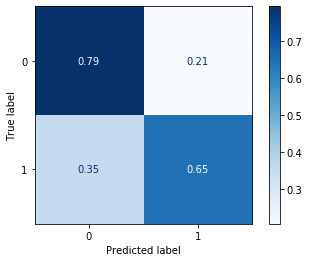

In [44]:
evaluate_model(X_test, y_test, dt_classifier)

### Feature Importance Visualization: Decision Tree

In [45]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sort = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(10)
    sort.plot(kind ='barh')
    #plt.figure(figsize=(12,60))
    #plt.barh(range(n_features), sort, align='center') 
    #plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.title('Feature Importance')
    plt.ylabel('Feature')
    
    plt.show()
    
    return sort

#  Bar graph with corr matrix 
    
def get_corr(df, model):
    sort = plot_feature_importances(model)
    df_corr = df.corr()['target']
    df_corr.loc[sort.index].plot(kind='barh', figsize=(5,5))


###  GridsearchCV

In [46]:
# Perform a 3-fold cross-validation on the training data 
# using the dt_classifier (from last section)

dt_cv_score = cross_val_score(dt_classifier, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 78.22%


In [47]:
# Need to create a dictionary for Combinatoric Grid Searching

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [48]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [49]:
dt_best_model = dt_grid_search.best_estimator_

In [50]:
# Mean training score
dt_gs_training_score = dt_best_model.score(X_train, y_train)

# Mean test score
dt_gs_testing_score = dt_best_model.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 89.68%
Mean Test Score: 75.16%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

### After Gridsearch: Feature Importance Visuals 

Accuracy is :75.16

AUC is :0.71

Confusion Matrix
----------------


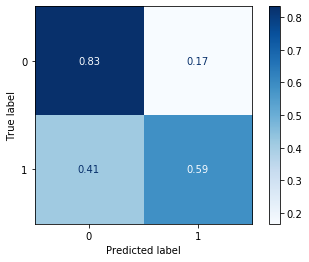

In [51]:
evaluate_model(X_test, y_test, dt_best_model)

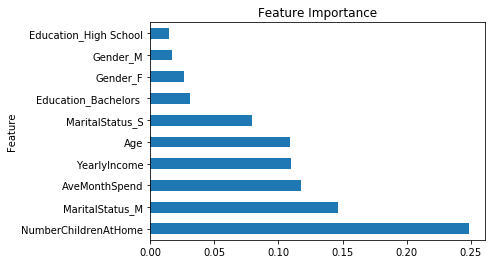

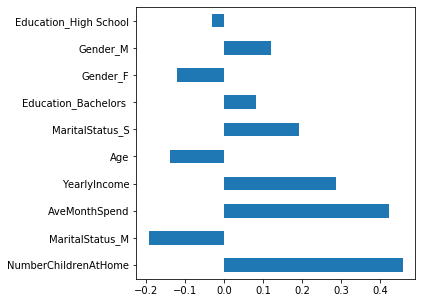

In [52]:
get_corr(df, dt_best_model)

## Second Model: Bagging Classifier

### Imports for Model

In [53]:
np.random.seed(0)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### BaggingClassifier

In [54]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [55]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

### BaggingClassifier Training Accuracy Score

In [56]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.7937031651940499

### BaggingClassifier Test Accuracy Score
(the accuracy score that really matters) 



In [57]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.7453731343283582

## Third Model:  Random Forest

In [58]:
#Forest Grid Search

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
forest_grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100), dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [59]:
# Instantiate and fit a RandomForestClassifier
forest = forest_grid_search.best_estimator_
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Training Accuracy Score

In [60]:
# Training accuracy score
forest.score(X_train, y_train)

0.8071804048764121

### Test Accuracy Score

In [61]:
# Test accuracy score
forest.score(X_test, y_test)

0.7814925373134328

### Evaluate Model
Accuracy, AUC & Confusion Matrix Results

Accuracy is :78.15

AUC is :0.76

Confusion Matrix
----------------


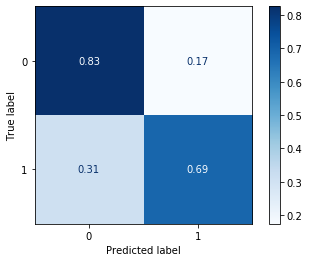

In [62]:
evaluate_model(X_test, y_test, forest)

### Feature Importance Visualization

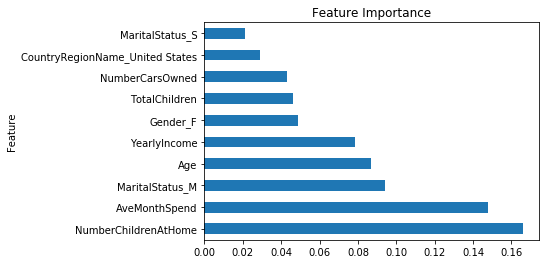

NumberChildrenAtHome               0.166105
AveMonthSpend                      0.147523
MaritalStatus_M                    0.094329
Age                                0.086866
YearlyIncome                       0.078721
Gender_F                           0.049000
TotalChildren                      0.046335
NumberCarsOwned                    0.043057
CountryRegionName_United States    0.028868
MaritalStatus_S                    0.021193
dtype: float64

In [63]:
plot_feature_importances(forest)

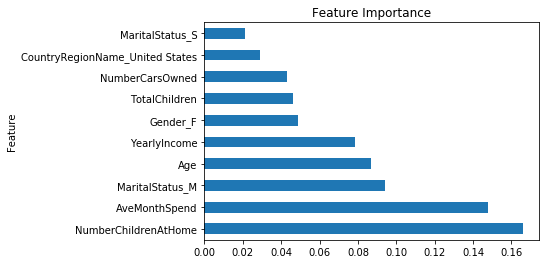

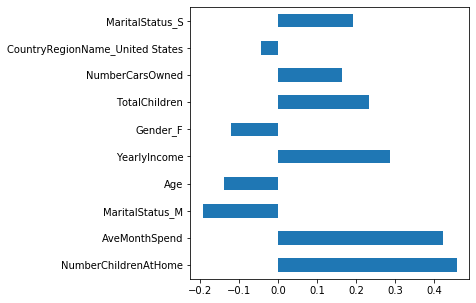

In [68]:
get_corr(df, forest)

## Fourth Model: XGBoost

### Imports for this model

In [64]:
from xgboost import XGBClassifier

### Fit
### Predict
### Training and Test Accuracy Scores

In [65]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 84.58%
Test Accuracy: 80.24%


### Evaluate Model
Accuracy, AUC & Confusion Matrix Results

Accuracy is :80.24

AUC is :0.77

Confusion Matrix
----------------


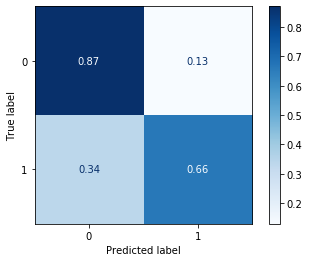

In [66]:
evaluate_model(X_test, y_test, xgb)

### Feature Importance Visualization

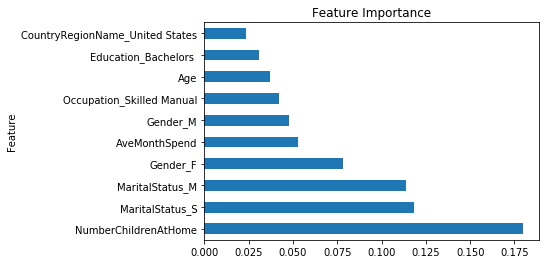

NumberChildrenAtHome               0.179908
MaritalStatus_S                    0.118341
MaritalStatus_M                    0.114071
Gender_F                           0.078418
AveMonthSpend                      0.052746
Gender_M                           0.047624
Occupation_Skilled Manual          0.042335
Age                                0.037332
Education_Bachelors                0.030939
CountryRegionName_United States    0.023428
dtype: float32

In [67]:
plot_feature_importances(xgb)

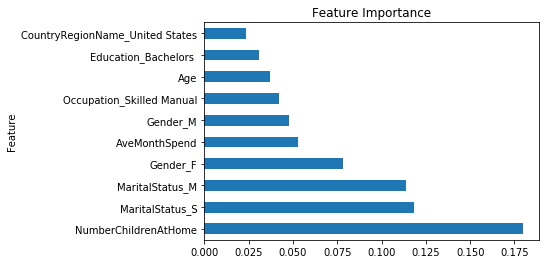

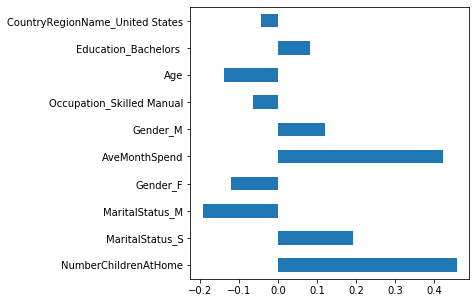

In [69]:
get_corr(df,xgb)

# INTERPRET 

How best can we spend our marketing budgets is the staggering question we need to find best ways to answers.  Most of our marketing campaigns key component are who should we be targeting as new buyers.  These are the most expensive sales and marketing projects that we do.  Therefore, we have looked to data science to help us best manage our marketing budgets and specifically we looked at machine learning tools to predict trends with our data.  

 We evaluated a total of 4 models:

Decision Tree
Random Forest
Bagging
XGBoost

to find what are the best possible social demographic features to target potential new bike buyers for a series of marketing campaigns.  The two major reasons to have multiple models are to find the most accurate along with models that work best with our data.  Of those models, XGBoost was the one with the highest accuracy score of 80.2% but it was not much behind Random Forest accuracy score of 78.2%.  

We ultimately decided to use results from the Random Forest model for a handful of reasons, even though XGBoost had a little higher accuracy score.  Reasons why Random Forest selected:

Has less variance than other models
One of the most accurate models (in general)
3 of the 4 models had almost the exact same feature relevance (XGBoost was different one)

It should be noted that the reason we didn’t select XGBoost because of its higher accuracy score are because of its results set being different from the other models and XGBoost can sometimes be difficult to manage due to its need to a lot of effort for parameter tuning.  

We recommend that the marketing campaigns that we do over the next year should focus on the following demographic attributes for campaigns for new bike buyers:

Number of kids
Average monthly spend
Yearly income

Please focus on these attributes for the marketing list that we build with internal contact info as well contact lists that we purchase.  These attributes are the best to increase new bike purchases.

